# **Assignment 5: Expectation Maximization**

By: Philip Blumin and Daniel Kim

imports

In [248]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import itertools
from scipy.stats import norm
import numpy.matlib
import pandas as pd

# **1-D case**

The getCov function takes in the sigmas and multiplies each of them by a 2 by 2 identity matrix. The result is K covariance matrices, which in this case will be 3

In [249]:
def getCov(sigma,K):
  cov_new = []
  for i in range(0,K):
    cov_new.append(sigmas[i]*np.eye(2))

  return cov_new

The loglike function takes in the mean, cov, pi, and x and returns the log likelihood based off equation 9.28 in the textbook

In [250]:
def loglike(mean,cov,pi,x):
  sum = 0
  for n in range(0,len(x)):
    innerSum = 0
    for k in range(0,len(mean)):
      innerSum += pi[k]*norm.pdf(x[n],mean[k],cov[k])
    sum += np.log(innerSum)

  return sum

The gamma2 function takes in the mean, cov, pi, and x and returns gamma(Znk) bassed off equation 9.23 in the textbook

In [251]:
def gamma2(mean,cov,pi,x):
  gamma = []

  lower = np.zeros(len(x))
  for j in range(0,len(mean)):
    lower += pi[j]*norm.pdf(x,mean[j],np.sqrt(cov[j]))

  for k in range(0,len(mean)):
    upper = pi[k] * norm.pdf(x,mean[k],np.sqrt(cov[k]))
    gamma.append(upper/lower)
  
  gamma = np.asmatrix(gamma)
  return gamma

In [252]:
from scipy.stats import multivariate_normal

The N_K function sums gamma over the 1st dimension

In [254]:
def N_k(gamma):
  return np.sum(gamma_znk.T, axis=0)

Below the x data vector was generated. This was done by coming up with 3 means, variances, and pis. Note the pis must sum to 1. Then based off the 3 probabilty sections different normals are generated. Additionally, 3 different class lists are made based off the probabilty sections

In [ ]:
#generate data
N = 1000
K = 3
mean = [-2,0,2]
vars = [0.1, 0.4, 0.7]
pi = [0.1,0.3,0.6]

x = []
class0 = []
class1 = []
class2 = []
for i in range(0,N):
  a = np.random.uniform(0,1,1)
  if a <= pi[0]:
    x.append(np.random.normal(mean[0],np.sqrt(vars[0]),1)[0])
    class0.append(np.random.normal(mean[0],np.sqrt(vars[0]),1)[0])
  elif a > pi[0] and a <= (pi[0] + pi[1]):
    x.append(np.random.normal(mean[1],np.sqrt(vars[1]),1)[0])
    class1.append(np.random.normal(mean[1],np.sqrt(vars[1]),1)[0])
  elif a > (pi[0] + pi[1]):
    x.append(np.random.normal(mean[2],np.sqrt(vars[2]),1)[0])
    class2.append(np.random.normal(mean[2],np.sqrt(vars[2]),1)[0])

The algorithm

In [ ]:
#equations 9.23-9.28
############# STEP 1 #############
#guess mean, var, and pi
mean_new = [1,2,3]
vars_new = [0.15,0.35,0.55]
pi_new = [1/6,2/6,3/6]

all_mean_new = []
all_vars_new = []
all_pi_new = []

# mean_new = [-1.9,0,2.1]
# vars_new = [0.15, 0.35, 0.95]
# pi_new = [0.1,0.35,0.55]

for i in range(0,1000):

  all_mean_new.append(mean_new)
  all_vars_new.append(vars_new)
  all_pi_new.append(pi_new)


  initLogs = loglike(mean_new,vars_new,pi_new,x)

  ############# STEP 2 #############
  gamma_znk = gamma2(mean_new,vars_new,pi_new,x)

  ############# STEP 3 #############
  nk = N_k(gamma_znk)

  mean_new = np.multiply(1/(nk), np.sum(np.multiply(gamma_znk,np.asmatrix(x)),axis=1).T)

  # subtracted = np.subtract(np.matlib.repmat(x, 3, 1), mean_new.T)

  # vars_new = np.multiply(1/(nk), np.sum(gamma_znk @ subtracted.T @ subtracted,axis=1).T)

  for k in range(0,len(mean_new.T)):
    sum = 0
    for n in range(0,len(x)):
      sum += gamma_znk[k,n] * (x[n]-mean_new[0,k]) * (x[n]-mean_new[0,k])

    vars_new[k] = 1/nk[0,k] * sum


  pi_new = nk/N

  mean_new = mean_new.tolist()[0]
  #vars_new = vars_new.tolist()[0]
  pi_new = pi_new.tolist()[0]

  if i % 50 == 0:
    print(i)
    print("means:", mean_new)
    print("var:", vars_new)
    print("pi:", pi_new)
    print("-------------")


0
means: [0.3686749998383205, 1.1566097438084015, 1.7597596623416947]
var: [0.4083356246311485, 2.0507548586249027, 3.605496247271253]
pi: [0.35819361687312323, 0.3503563758121122, 0.29145000731476445]
-------------
50
means: [-0.18669289996794863, 2.198234397973592, 0.3177573255050201]
var: [1.5582903953813068, 0.6110203488701539, 1.6431420189130617]
pi: [0.17905823098961707, 0.4375130373616511, 0.38342873164873187]
-------------
100
means: [-0.0868312872128558, 2.263995796551815, 0.5613941404011177]
var: [1.672821667284392, 0.5002535005902606, 1.883394412411674]
pi: [0.19453569993951805, 0.36113758073199315, 0.44432671932848883]
-------------
150
means: [-0.11454656703905992, 2.286155077045925, 0.7654950802702828]
var: [1.710160374696253, 0.4062993321667247, 1.9906132559250507]
pi: [0.2040464399645802, 0.30528775797502256, 0.49066580206039717]
-------------
200
means: [-0.31330935682825756, 2.29120780153297, 0.9245611129529718]
var: [1.6033493453147512, 0.36546366352558435, 1.8996764

As seen from the results above the means seem to converge the actual means that were used to generate x

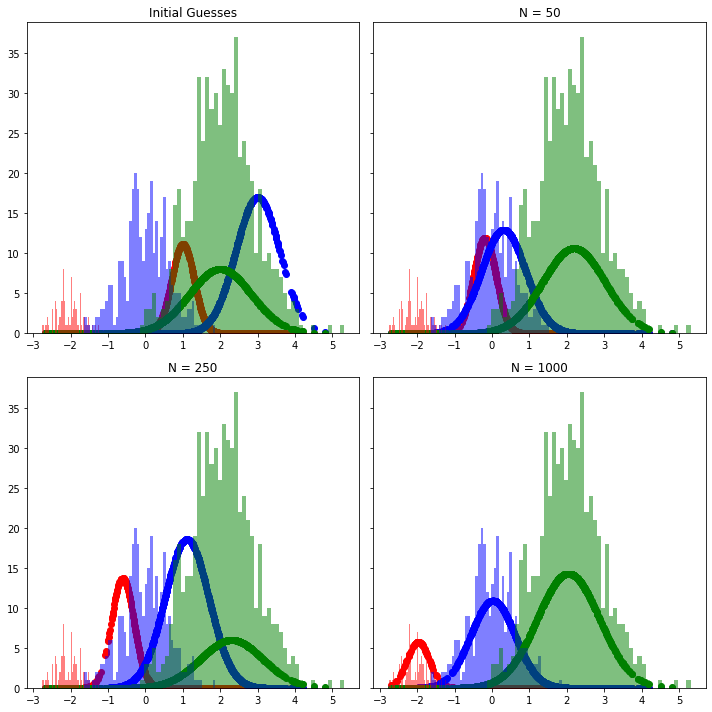

In [ ]:
x_hist_0 = pi[1] * norm.pdf(class1,mean[1],np.sqrt(vars[1]))
xnew_hist_0 = pi_new[1] * norm.pdf(class1,mean_new[1],np.sqrt(vars_new[1]))
n_bins = 50

# Generate a normal distribution, center at x=0 and y=5
# x = np.random.randn(N_points)
# y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(2,2, sharey=True, tight_layout=True, figsize=(10,10))

# We can set the number of bins with the `bins` kwarg
axs[0,0].hist(class0, bins=n_bins, color='r', alpha=0.5) #1
axs[0,0].hist(class1, bins=n_bins, color='b', alpha=0.5) #2
axs[0,0].hist(class2, bins=n_bins, color='g', alpha=0.5) #3

axs[0,0].scatter(x,50*(all_pi_new[0][0] * norm.pdf(x,all_mean_new[0][0],np.sqrt(all_vars_new[0][0]))), color='r') #3
axs[0,0].scatter(x,50*(all_pi_new[0][2] * norm.pdf(x,all_mean_new[0][2],np.sqrt(all_vars_new[0][2]))), color='b') #2
axs[0,0].scatter(x,50*(all_pi_new[0][1] * norm.pdf(x,all_mean_new[0][1],np.sqrt(all_vars_new[0][1]))), color='g') #1
axs[0,0].set_title('Initial Guesses')

axs[0,1].hist(class0, bins=n_bins, color='r', alpha=0.5) #1
axs[0,1].hist(class1, bins=n_bins, color='b', alpha=0.5) #2
axs[0,1].hist(class2, bins=n_bins, color='g', alpha=0.5) #3

axs[0,1].scatter(x,50*(all_pi_new[49][0] * norm.pdf(x,all_mean_new[49][0],np.sqrt(all_vars_new[49][0]))), color='r') #3
axs[0,1].scatter(x,50*(all_pi_new[49][2] * norm.pdf(x,all_mean_new[49][2],np.sqrt(all_vars_new[49][2]))), color='b') #2
axs[0,1].scatter(x,50*(all_pi_new[49][1] * norm.pdf(x,all_mean_new[49][1],np.sqrt(all_vars_new[49][1]))), color='g') #1
axs[0,1].set_title('N = 50')

axs[1,0].hist(class0, bins=n_bins, color='r', alpha=0.5) #1
axs[1,0].hist(class1, bins=n_bins, color='b', alpha=0.5) #2
axs[1,0].hist(class2, bins=n_bins, color='g', alpha=0.5) #3

axs[1,0].scatter(x,50*(all_pi_new[249][0] * norm.pdf(x,all_mean_new[249][0],np.sqrt(all_vars_new[249][0]))), color='r') #3
axs[1,0].scatter(x,50*(all_pi_new[249][2] * norm.pdf(x,all_mean_new[249][2],np.sqrt(all_vars_new[249][2]))), color='b') #2
axs[1,0].scatter(x,50*(all_pi_new[249][1] * norm.pdf(x,all_mean_new[249][1],np.sqrt(all_vars_new[249][1]))), color='g') #1
axs[1,0].set_title('N = 250')

axs[1,1].hist(class0, bins=n_bins, color='r', alpha=0.5) #1
axs[1,1].hist(class1, bins=n_bins, color='b', alpha=0.5) #2
axs[1,1].hist(class2, bins=n_bins, color='g', alpha=0.5) #3

axs[1,1].scatter(x,50*(all_pi_new[999][0] * norm.pdf(x,all_mean_new[999][0],np.sqrt(all_vars_new[999][0]))), color='r') #3
axs[1,1].scatter(x,50*(all_pi_new[999][2] * norm.pdf(x,all_mean_new[999][2],np.sqrt(all_vars_new[999][2]))), color='b') #2
axs[1,1].scatter(x,50*(all_pi_new[999][1] * norm.pdf(x,all_mean_new[999][1],np.sqrt(all_vars_new[999][1]))), color='g') #1
axs[1,1].set_title('N = 1000')


fig.show()

Looks good :)

# **2-D case**

In [264]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

This function is exactly the same as the previous function, but instead the multivariate normal distribution is used. 

In [256]:
def gamma2_multi(mean,cov,pi,x):
  gamma = []

  lower = np.zeros(len(x))
  for j in range(0,len(mean)):
    lower += pi[j]*multivariate_normal.pdf(x,mean[j],cov[j])

  for k in range(0,len(mean)):
    upper = pi[k] * multivariate_normal.pdf(x,mean[k],cov[k])
    gamma.append(upper/lower)
  
  gamma = np.asmatrix(gamma)
  return gamma

In [257]:
df = pd.read_csv('faithful.csv')

In [258]:
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


Before using the data exactly as before we need to do a bit of preproccessing. First the useless column is dropped. Then all the data is normalized. 

In [259]:
df = df.drop(['Unnamed: 0'], axis=1)

In [260]:
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)

In [65]:
len(df_scaled)

272

In [261]:
mean_new = [[-1.5,1],[1.5,-1]]
all_mean_new = []
all_mean_new.append(mean_new)
all_mean_new

[[[-1.5, 1], [1.5, -1]]]

Same procedure as before 

In [262]:
#equations 9.23-9.28
############# STEP 1 #############
N = len(df_scaled)
mean_new = [[-1.5,1],[1.5,-1]]
vars_new = [1/4*np.eye(2),1/4*np.eye(2)]
pi_new = [1/2,1/2]


mean_new1 = [[-1.5,1],[1.5,-1]]
vars_new1 = [1/4*np.eye(2),1/4*np.eye(2)]
pi_new1 = [1/2,1/2]


all_mean_new = []
all_vars_new = []
all_pi_new = []
all_mean_new.append(mean_new1)
all_vars_new.append(vars_new1)
all_pi_new.append(pi_new1)
# mean_new = [-1.9,0,2.1]
# vars_new = [0.15, 0.35, 0.95]
# pi_new = [0.1,0.35,0.55]

for i in range(0,20):

  all_mean_new.append(mean_new)
  all_vars_new.append(vars_new)
  all_pi_new.append(pi_new)

  initLogs = loglike(mean_new,vars_new,pi_new,df_scaled)

  ############# STEP 2 #############
  gamma_znk = gamma2_multi(mean_new,vars_new,pi_new,df_scaled)

  ############# STEP 3 #############
  nk = N_k(gamma_znk)

  # mean_new = np.multiply((1/(nk)),np.sum(np.multiply(gamma_znk,np.asmatrix(df_scaled).T),axis=1))

  for k in range(0,len(mean_new)):
    sum = 0
    for n in range(0,len(df_scaled)):
      sum += gamma_znk[k,n] * (df_scaled[n])

    mean_new[k] = 1/nk[0,k] * sum
  mean_new = np.array(mean_new)
    
  #print(mean_new)

  for k in range(0,len(mean_new.T)):
    sum = 0
    for n in range(0,len(df_scaled)):
      sum += gamma_znk[k,n] * np.asmatrix((df_scaled[n]-mean_new[k])).T @ np.asmatrix((df_scaled[n]-mean_new[k]))

    vars_new[k] = 1/nk[0,k] * sum
  #print(sum)
  vars_new = np.array(vars_new)
  pi_new = nk/N

  mean_new = mean_new.tolist()
  #vars_new = vars_new.tolist()
  pi_new = pi_new.tolist()[0]


  print(i)
  print("means:", mean_new)
  print("var:", vars_new)
  print("pi:", pi_new)
  print("-------------")

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


0
means: [[-0.7339964127539441, -0.47643285128812884], [0.6836963988421556, 0.44378340146601014]]
var: [[[0.71152842 0.84746608]
  [0.84746608 1.1445201 ]]

 [[0.29943145 0.32135204]
  [0.32135204 0.45700701]]]
pi: [0.48225990373219185, 0.517740096267808]
-------------
1
means: [[-0.7952378310024613, -0.5866496545248833], [0.7614194630954383, 0.5617017294189554]]
var: [[[0.65400996 0.79123783]
  [0.79123783 1.12049343]]

 [[0.14600727 0.13134769]
  [0.13134769 0.23959973]]]
pi: [0.48913750379250254, 0.5108624962074974]
-------------
2
means: [[-0.8674258966327113, -0.6926861530454309], [0.7904879525863603, 0.6312470737055416]]
var: [[[0.55738236 0.67308069]
  [0.67308069 0.99350561]]

 [[0.09279792 0.0617894 ]
  [0.0617894  0.17018938]]]
pi: [0.4767967605546596, 0.5232032394453404]
-------------
3
means: [[-0.9401501620497932, -0.7938401562154639], [0.7920397054566753, 0.6687792534521473]]
var: [[[0.45823107 0.54092582]
  [0.54092582 0.82969316]]

 [[0.08445596 0.04554784]
  [0.0455478

The following code for plotting an ellipse was taken from this source: https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html


In [280]:
def plotEllip(cov, mean, axs,c):
  mean_x = mean[0]
  mean_y = mean[1]
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
  ell_radius_x = np.sqrt(1 + pearson)
  ell_radius_y = np.sqrt(1 - pearson)
  ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                    edgecolor=c, facecolor='none', lw = 4)

  scale_x = np.sqrt(cov[0, 0]) * 1
  scale_y = np.sqrt(cov[1, 1]) * 1

  transf = transforms.Affine2D() \
          .rotate_deg(45) \
          .scale(scale_x, scale_y) \
          .translate(mean_x, mean_y)

  ellipse.set_transform(transf + axs.transData)

  return axs.add_patch(ellipse)

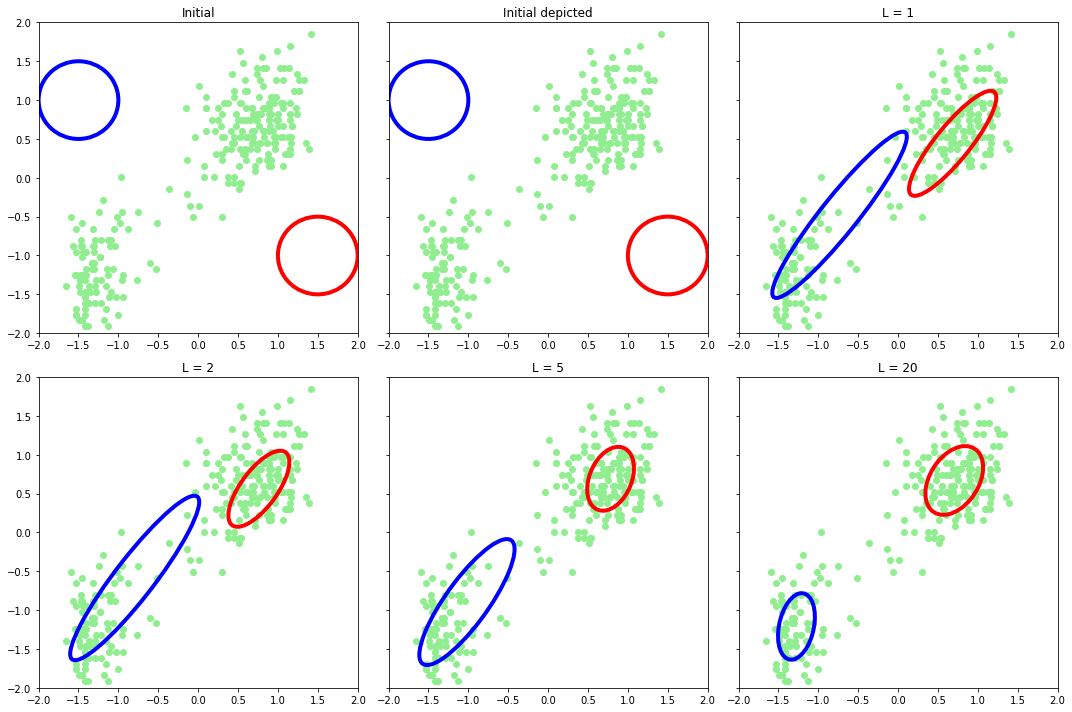

In [285]:
fig, axs = plt.subplots(2,3, sharey=True, tight_layout=True, figsize=(15,10))

#1
axs[0,0].scatter(df_scaled[:,0],df_scaled[:,1],c='lightgreen')

plotEllip(all_vars_new[0][0], all_mean_new[0][0], axs[0,0],'b')
plotEllip(all_vars_new[0][1], all_mean_new[0][1], axs[0,0],'r')
axs[0,0].set_xlim([-2,2])
axs[0,0].set_ylim([-2,2])
axs[0,0].set_title("Initial")

#2
axs[0,1].scatter(df_scaled[:,0],df_scaled[:,1],c='lightgreen')

plotEllip(all_vars_new[0][0], all_mean_new[0][0], axs[0,1],'b')
plotEllip(all_vars_new[0][1], all_mean_new[0][1], axs[0,1],'r')
axs[0,1].set_xlim([-2,2])
axs[0,1].set_ylim([-2,2])
axs[0,1].set_title("Initial depicted")

#3
axs[0,2].scatter(df_scaled[:,0],df_scaled[:,1],c='lightgreen')

plotEllip(all_vars_new[1][0], all_mean_new[1][0], axs[0,2],'b')
plotEllip(all_vars_new[1][1], all_mean_new[1][1], axs[0,2],'r')
axs[0,2].set_xlim([-2,2])
axs[0,2].set_ylim([-2,2])
axs[0,2].set_title("L = 1")

#4
axs[1,0].scatter(df_scaled[:,0],df_scaled[:,1],c='lightgreen')

plotEllip(all_vars_new[2][0], all_mean_new[2][0], axs[1,0],'b')
plotEllip(all_vars_new[2][1], all_mean_new[2][1], axs[1,0],'r')
axs[1,0].set_xlim([-2,2])
axs[1,0].set_ylim([-2,2])
axs[1,0].set_title("L = 2")

#5
axs[1,1].scatter(df_scaled[:,0],df_scaled[:,1],c='lightgreen')

plotEllip(all_vars_new[5][0], all_mean_new[5][0], axs[1,1],'b')
plotEllip(all_vars_new[5][1], all_mean_new[5][1], axs[1,1],'r')
axs[1,1].set_xlim([-2,2])
axs[1,1].set_ylim([-2,2])
axs[1,1].set_title("L = 5")

#6
axs[1,2].scatter(df_scaled[:,0],df_scaled[:,1],c='lightgreen')

plotEllip(all_vars_new[20][0], all_mean_new[20][0], axs[1,2],'b')
plotEllip(all_vars_new[20][1], all_mean_new[20][1], axs[1,2],'r')
axs[1,2].set_xlim([-2,2])
axs[1,2].set_ylim([-2,2])
axs[1,2].set_title("L = 20")

fig.show()

Graph is perfect